In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
auc = pd.read_csv("data/auctions.csv")
evt = pd.read_csv("data/events.csv")
inst = pd.read_csv("data/installs.csv")

/home/sol/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
subs = auc

In [4]:
subs.columns

Index(['auction_type_id', 'country', 'date', 'device_id', 'platform',
       'ref_type_id', 'source_id'],
      dtype='object')

In [5]:
subs['source_id'].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

Quiero ver que información puedo encontrar en las fechas de las subastas



In [6]:
subs['real_date'] = pd.to_datetime(subs['date'], format='%Y%m%d %H:%M:%S.%f').dt.date
subs_by_date = subs['real_date'].value_counts()
subs_by_date.head(1)

2019-03-13    2938373
Name: real_date, dtype: int64

/home/sol/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


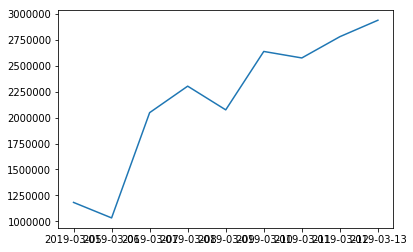

In [7]:
plot1 = sns.lineplot(x = subs_by_date.index, y = subs_by_date.values)


# Veo qué me dicen los events

In [8]:
evt.columns

Index(['date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')

In [9]:
evt.dtypes

date                   object
event_id                int64
ref_type                int64
ref_hash                int64
application_id          int64
attributed               bool
device_countrycode      int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id               object
user_agent            float64
event_uuid             object
carrier               float64
kind                  float64
device_os             float64
wifi                   object
connection_type        object
ip_address              int64
device_language       float64
dtype: object

In [10]:
evt.count()

date                  2494423
event_id              2494423
ref_type              2494423
ref_hash              2494423
application_id        2494423
attributed            2494423
device_countrycode    2494423
device_os_version     1022066
device_brand          1164963
device_model          2406456
device_city            614698
session_user_agent    2482637
trans_id                   82
user_agent            1391527
event_uuid            2489324
carrier                616434
kind                  2489324
device_os              657667
wifi                  1378872
connection_type        612463
ip_address            2494423
device_language       2406604
dtype: int64

## Catidad de eventos según el tipo de conexión

In [11]:
conexiones = evt['connection_type'].value_counts()
conexiones

Cable/DSL    331948
Cellular     280511
Corporate         4
Name: connection_type, dtype: int64

Text(0.5, 0, 'Tipo de conexión')

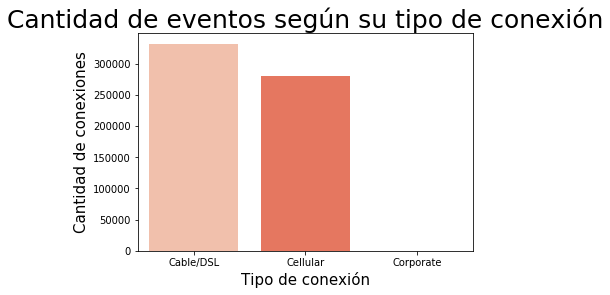

In [12]:
grf = sns.barplot(x = conexiones.index, y = conexiones.values, orient = 'v', palette = 'Reds')
grf.set_title("Cantidad de eventos según su tipo de conexión", fontsize = 25)
grf.set_ylabel("Cantidad de conexiones", fontsize = 15)
grf.set_xlabel("Tipo de conexión", fontsize = 15)

## Alternativa con piechart 

Como el tipo Corporate tiene tan solo 4 apariciones y los otros más de 200 mil tiene un valor despreciable frente a los otros dos.

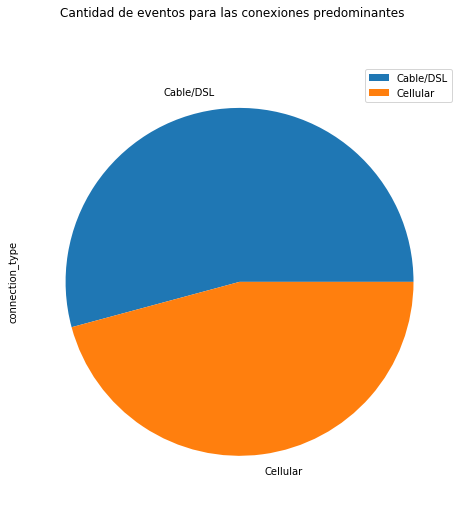

In [13]:
df_conexiones = conexiones.to_frame().loc[ conexiones.index != 'Corporate',]
plot = df_conexiones.plot(kind='pie', subplots=True, figsize=(8, 8), title = 'Cantidad de eventos para las conexiones predominantes', )

## Veo que hay en las instalaciones

In [14]:
inst.dtypes

created                object
application_id          int64
ref_type                int64
ref_hash                int64
click_hash            float64
attributed               bool
implicit                 bool
device_countrycode      int64
device_brand          float64
device_model          float64
session_user_agent     object
user_agent             object
event_uuid             object
kind                   object
wifi                   object
trans_id               object
ip_address              int64
device_language       float64
dtype: object

Veamos que puedo encontrar entre los "user_agent"

In [15]:
agentes = inst['user_agent'].value_counts().to_frame()
agentes.columns = ['installs_count']
agentes.T

,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,MercadoPago/2.59.0.1 CFNetwork/976 Darwin/18.2.0,MercadoPago/2.57.0.2 CFNetwork/976 Darwin/18.2.0,Dalvik/2.1.0 (Linux; U; Android 8.1.0; SM-G610M Build/M1AJQ),Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-J500M Build/MMB29M),Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G532MT Build/MMB29T),Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-G570M Build/R16NW),Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G532M Build/MMB29T),Dalvik/2.1.0 (Linux; U; Android 7.0; LG-M250 Build/NRD90U),Dalvik/2.1.0 (Linux; U; Android 7.1.1; Moto G Play Build/NPIS26.48-43-2),...,MercadoPago/2.57.0.2 CFNetwork/889.9 Darwin/17.2.0,Dalvik/2.1.0 (Linux; U; Android 8.0.0; RNE-L23 Build/HUAWEIRNE-L23),Dalvik/2.1.0 (Linux; U; Android 8.1.0; moto e5 play Build/OPGS28.54-53-2),Dalvik/2.1.0 (Linux; U; Android 8.1.0; Moto G (5) Build/OPPS28.85-16-2),Dalvik/2.1.0 (Linux; U; Android 6.0.1; D6543 Build/23.5.A.1.291),HotelUrbano/2189 CFNetwork/902.2 Darwin/17.7.0,Dalvik/2.1.0 (Linux; U; Android 8.1.0; SM-N9600 Build/M1AJQ),MercadoPago/2.32.0.8 CFNetwork/976 Darwin/18.2.0,Dalvik/2.1.0 (Linux; U; Android 6.0.1; ASUS_Z00UD Build/MMB29P),Dalvik/2.1.0 (Linux; U; Android 7.0; SM-G950F Build/NRD90M)
installs_count,393,141,89,37,36,36,28,22,18,17,...,1,1,1,1,1,1,1,1,1,1
